# 上课的代码

## 数据准备

In [1]:
import pandas as pd # 数据表
df = pd.read_excel('text_analysis_ad.xlsx', index_col = 0)
df

,index,商品名称,商品类别,出版年,广告文本,广告标题
0,1596,五华牌香烟[May Blossom],烟草制品,1932,兰勃脱白脱勒公司 五华牌香烟 佛及尼埃香烟 二十枝装每包售国币大洋二角 五十枝装每罐售国币...,"五华牌香烟,""兰勃脱白脱勒公司 五华牌香烟 佛及尼埃香烟"""
1,5627,韦廉士红色清导丸[Dr.Willams' Pink Pills For Pale People],药品,1918,讲求卫生为人生本性天理固然也 人生首贵逐日大便通畅有序为天然所当如此也如若大便不利大肠阻塞则...,韦廉士红色清导丸:'讲求卫生为人生本性天理固然也'
2,13532,大炮台香烟[Three Castles Cigarettes],烟草制品,1935,"香味馥郁,不让名花 另有三炮台出售","大炮台香烟,""香味馥郁 不让名花"""
3,1133,婴孩自己药片[Baby's Own],药品,1930,差肩儿女 秀慧康强 闽有佳音讃羡婴孩自己药片 每年此际小儿患肠胃病者甚多而尤以南方各地天气翳...,"婴孩自己药片,""差肩儿女 秀慧康强 闽有佳音赞美婴孩自己药片"""
4,3146,亚士北罗药片[Aspro],药品,1933,何以亚士北罗是妇女们的腻友？各国妇女力证亚士北罗药片是她们最需要的药物！为什么？她们的经验知...,"亚士北罗药片,""妇女之腻友"""
...,...,...,...,...,...,...
495,14176,安住蚊烟香,化肥及杀虫剂,1935,安住蚊烟香 臭虫立毙药粉 世界第一名产 安住蚊烟香 蚊见逃慌慌 暑夜不用帐 包睡到天光 汉口...,"安住蚊烟香,""世界第一名产"""
496,11610,第威德润肠丸[DeWitt's],药品,1934,眉色清秀 气色壮旺 此第威德润肠丸之功也 第威德润肠丸系以草药炼制纯粹和平十分安全功能清理肠...,"第威德润肠丸,""眉色清秀 气色壮旺"""
497,10256,如意膏[She-Ko],药品,1934,汤火烫伤 立攃如意膏可免严重之后果 皮肤受伤当以灼烫最痛苦其又因此震激而致命者治疗灼烫止痛消...,"如意膏,""汤火烫伤 立攃如意膏可免严重之后果"""
498,9176,六零六药膏,药品,1923,清血解毒六零六 花柳梅毒瘰*疮疖癣疥**及筋骨酸痛四肢麻木半身疯*等症状虽异其发生之原理莫不...,"六零六,""清血解毒六零六"""


In [2]:
# 分词
import jieba # 中文分词

def clean_text(text):
    words = jieba.lcut(text)    
    return ' '.join(words)
    
test = df['广告文本'][0]
clean_text(test)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\dell\AppData\Local\Temp\jieba.cache
Loading model cost 0.556 seconds.
Prefix dict has been built successfully.


'兰勃 脱白 脱勒 公司   五华 牌 香烟   佛及 尼埃 香烟     二十 枝装 每包 售 国币 大洋 二角   五十 枝装 每罐 售 国币 大洋   五角'

In [3]:
df['广告文本分词'] = df['广告文本'].apply(clean_text)
df

,index,商品名称,商品类别,出版年,广告文本,广告标题,广告文本分词
0,1596,五华牌香烟[May Blossom],烟草制品,1932,兰勃脱白脱勒公司 五华牌香烟 佛及尼埃香烟 二十枝装每包售国币大洋二角 五十枝装每罐售国币...,"五华牌香烟,""兰勃脱白脱勒公司 五华牌香烟 佛及尼埃香烟""",兰勃 脱白 脱勒 公司 五华 牌 香烟 佛及 尼埃 香烟 二十 枝装 每包 ...
1,5627,韦廉士红色清导丸[Dr.Willams' Pink Pills For Pale People],药品,1918,讲求卫生为人生本性天理固然也 人生首贵逐日大便通畅有序为天然所当如此也如若大便不利大肠阻塞则...,韦廉士红色清导丸:'讲求卫生为人生本性天理固然也',讲求 卫生 为 人生 本性 天理 固然 也 人生 首贵 逐日 大便 通畅 有序 为 天然...
2,13532,大炮台香烟[Three Castles Cigarettes],烟草制品,1935,"香味馥郁,不让名花 另有三炮台出售","大炮台香烟,""香味馥郁 不让名花""","香味 馥郁 , 不让 名花 另 有 三 炮台 出售"
3,1133,婴孩自己药片[Baby's Own],药品,1930,差肩儿女 秀慧康强 闽有佳音讃羡婴孩自己药片 每年此际小儿患肠胃病者甚多而尤以南方各地天气翳...,"婴孩自己药片,""差肩儿女 秀慧康强 闽有佳音赞美婴孩自己药片""",差肩 儿女 秀慧 康强 闽有 佳音 讃 羡 婴孩 自己 药片 每年 此际 小儿 ...
4,3146,亚士北罗药片[Aspro],药品,1933,何以亚士北罗是妇女们的腻友？各国妇女力证亚士北罗药片是她们最需要的药物！为什么？她们的经验知...,"亚士北罗药片,""妇女之腻友""",何以 亚士 北罗 是 妇女 们 的 腻友 ？ 各国 妇女 力证 亚士 北罗 药片 是 她们 ...
...,...,...,...,...,...,...,...
495,14176,安住蚊烟香,化肥及杀虫剂,1935,安住蚊烟香 臭虫立毙药粉 世界第一名产 安住蚊烟香 蚊见逃慌慌 暑夜不用帐 包睡到天光 汉口...,"安住蚊烟香,""世界第一名产""",安住 蚊烟香 臭虫 立毙 药粉 世界 第一名 产 安住 蚊烟香 蚊见 逃 慌...
496,11610,第威德润肠丸[DeWitt's],药品,1934,眉色清秀 气色壮旺 此第威德润肠丸之功也 第威德润肠丸系以草药炼制纯粹和平十分安全功能清理肠...,"第威德润肠丸,""眉色清秀 气色壮旺""",眉色 清秀 气色 壮旺 此 第 威德 润肠 丸 之功 也 第 威德 润肠 丸系 ...
497,10256,如意膏[She-Ko],药品,1934,汤火烫伤 立攃如意膏可免严重之后果 皮肤受伤当以灼烫最痛苦其又因此震激而致命者治疗灼烫止痛消...,"如意膏,""汤火烫伤 立攃如意膏可免严重之后果""",汤火 烫伤 立 攃 如意 膏 可免 严重 之 后果 皮肤 受伤 当以 灼烫 最 痛苦...
498,9176,六零六药膏,药品,1923,清血解毒六零六 花柳梅毒瘰*疮疖癣疥**及筋骨酸痛四肢麻木半身疯*等症状虽异其发生之原理莫不...,"六零六,""清血解毒六零六""",清血 解毒 六零 六 花柳 梅毒 瘰 * 疮 疖 癣疥 * * 及 筋骨 酸痛 四肢 麻...


## 词向量模型

词向量（Word Vectors）是将词语映射到向量空间，使其成为向量空间中的一个点。在这个空间中，语义上相似的单词在空间中的距离也相近。在这个向量空间中，每个词语都用一个向量表示，这个向量是多维的，并且每一维都是一个实数。这就是所谓“单个词语的词向量”。

使用词向量，我们可以进行各种文本分析任务，如文本分类、情感分析、文本相似度计算等。通过计算两个词向量之间的余弦相似度，我们可以得到这两个词语在语义上的相似度。

In [4]:
from gensim.test.utils import common_texts
common_texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

In [5]:
corpus = df['广告文本分词'].apply(lambda x: x.split()).tolist() # 切分词语
for document in corpus[:5]:
    print(document)

['兰勃', '脱白', '脱勒', '公司', '五华', '牌', '香烟', '佛及', '尼埃', '香烟', '二十', '枝装', '每包', '售', '国币', '大洋', '二角', '五十', '枝装', '每罐', '售', '国币', '大洋', '五角']
['讲求', '卫生', '为', '人生', '本性', '天理', '固然', '也', '人生', '首贵', '逐日', '大便', '通畅', '有序', '为', '天然', '所当', '如此', '也', '如若', '大便', '不利', '大', '肠阻塞', '则', '胃失', '消化', '疾病', '头痛', '肝火', '上升', '胆汁', '不', '调', '口气', '积浊', '舌现', '黄苔', '诸恙', '接踵', '而', '起', '矣', '凡', '此皆须', '服用', '韦廉士', '大', '医生', '红色', '清导丸', '以利', '大便', '俾得', '体质', '强健', '百病', '不侵', '也况', '此丸', '之', '功力', '天然', '平和', '不尚', '霸烈', '广东省', '城', '医生', '学', '研究会', '*', '生', '先生', '来示', '云弟', '患大', '便秘', '结之症', '一月', '有余', '困苦', '万状', '难以', '言喻', '服用', '韦廉士', '红色', '清导丸', '数粒', '大便', '畅达', '于是', '常为', '服用', '身体', '爽健为', '半生', '以来', '所', '未有', '也', '如', '尊处', '无从', '购买', '韦廉士', '红色', '清导丸', '祈即', '邮票', '大洋', '六角', '至', '上海', '四川', '路', '九十六', '号', '韦廉士', '医生', '药局', '原班', '邮奉', '一瓶', '可', '也']
['香味', '馥郁', ',', '不让', '名花', '另', '有', '三', '炮台', '出售']
['差肩', '儿女', '秀慧', '康强', '闽有', '佳音', '讃', '羡', '婴孩

In [6]:
# 自己训练词嵌入模型
from gensim.models import Word2Vec

# 训练词嵌入模型
model = Word2Vec(
    corpus,     # 训练预料
    window = 5,     # 训练算法考虑的当前词语与预测词语在一个句子中的最大距离（窗口大小）
    vector_size = 100,     # 自定义训练向量维度
    min_count = 1,     # 忽略所有总频数低于这个值的词语
    epochs = 10
)

# 保存训练好的模型
model.save('word2vec_ad.model')

In [7]:
word_list = model.wv.index_to_key  # 获取词汇表
word_vectors = model.wv[word_list]  # 获取词向量

# 打印词汇表和对应的词向量
for word, vector in list(zip(word_list, word_vectors))[:5]:
    print(f'{word}: {vector}')

之: [-5.44846952e-01  1.12320983e+00  5.28933287e-01 -4.79460955e-01
 -4.85596091e-01 -2.39689565e+00  8.67411792e-01  3.32041240e+00
 -1.30325854e+00 -1.36300802e+00 -4.08510774e-01 -1.92976367e+00
 -2.26834133e-01  1.35522628e+00  5.89634001e-01 -5.21520317e-01
  1.52051404e-01 -3.33055526e-01  8.19860678e-03 -2.20320678e+00
  1.16581702e+00 -1.05402343e-01  6.11293197e-01 -9.63839710e-01
  1.03285328e-01  7.76761351e-03 -2.40435690e-01 -1.08300745e+00
 -8.23763669e-01 -1.21772895e-02  9.97614682e-01  5.69610476e-01
  3.49150449e-01 -8.59014273e-01 -6.27546132e-01  1.78070045e+00
  6.28896415e-01 -1.03718746e+00 -1.02640128e+00 -2.34742141e+00
  6.96720555e-03 -6.00165606e-01  3.22516821e-02 -9.37363744e-01
  9.85484540e-01 -7.81335175e-01 -1.49179125e+00  5.13227105e-01
  1.28508806e+00  5.62172890e-01  3.24673504e-01 -2.43119925e-01
 -1.09113097e+00 -1.82006925e-01 -3.47033828e-01  9.36742842e-01
  2.57559597e-01  1.35565564e-01 -4.78115320e-01  5.29512644e-01
  3.58592004e-01  4.78

In [10]:
# 检查词嵌入模型中任意两个词向量的余弦相似度，即语义接近性
# 余弦相似度的取值介于[-1, 1]之间，-1表示语义完全相反，1表示语义完全相同，0表示毫无关系
# model.sv.similarity这个函数与np.dot(vector1, vector2) / (np.linalg.norm(vector1) * np.linalg.norm(vector2))的输出结果一致
print(model.wv.similarity('医生', '疼痛'))
print(model.wv.similarity('医生', '神经'))
print(model.wv.similarity('医生', '伤风'))
print(model.wv.similarity('疼痛', '神经'))
print(model.wv.similarity('疼痛', '伤风'))
print(model.wv.similarity('神经', '伤风'))

0.6962327
0.65204585
0.63245106
0.99471277
0.99142903
0.99553597


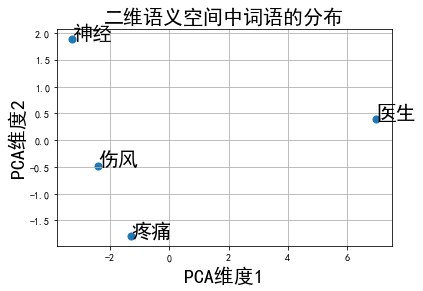

In [11]:
# 可视化

words = ['医生', '疼痛', '神经', '伤风']
vectors = [model.wv[word] for word in words]

from sklearn.decomposition import PCA     # 语义空间降维，用于展示词语在二维空间的相对位置

# 使用PCA进行降维
pca = PCA(n_components = 2)
pca_result = pca.fit_transform(vectors)

import matplotlib.pyplot as plt     # 画图

# 绘制四个词语在二维空间的相对位置
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.figure()

# 取PCA降维结果中所有行的第一列和第二列数据绘制散点图，设置点的大小为50
plt.scatter(pca_result[:, 0], pca_result[:, 1], s = 50)

for i, word in enumerate(words):
    plt.annotate(word, (pca_result[i, 0], pca_result[i, 1]), fontsize = 20)

plt.xlabel('PCA维度1', fontsize = 20)
plt.ylabel('PCA维度2', fontsize = 20)
plt.title('二维语义空间中词语的分布', fontsize = 20)
plt.grid(True)
plt.show()

In [12]:
from gensim.models.callbacks import CallbackAny2Vec

class callback(CallbackAny2Vec):
    '''Callback to print loss after each epoch.'''

    def __init__(self):
        self.epoch = 0
        self.loss_to_be_subed = 0

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        loss_now = loss - self.loss_to_be_subed
        self.loss_to_be_subed = loss
        print('Loss after epoch {}: {}'.format(self.epoch, loss_now))
        self.epoch += 1
        
# 自己训练词嵌入模型
from gensim.models import Word2Vec

# 训练词嵌入模型
model = Word2Vec(
    corpus,     # 训练预料
    window = 5,     # 训练算法考虑的当前词语与预测词语在一个句子中的最大距离（窗口大小）
    vector_size = 100,     # 自定义训练向量维度
    min_count = 1,     # 忽略所有总频数低于这个值的词语
    compute_loss=True, callbacks=[callback()],
    epochs = 50
)

# 保存训练好的模型
model.save('word2vec_ad.model')

Loss after epoch 0: 78607.7890625
Loss after epoch 1: 78145.4609375
Loss after epoch 2: 73168.671875
Loss after epoch 3: 62225.484375
Loss after epoch 4: 55096.71875
Loss after epoch 5: 51667.1875
Loss after epoch 6: 43270.53125
Loss after epoch 7: 47643.15625
Loss after epoch 8: 46101.125
Loss after epoch 9: 44823.375
Loss after epoch 10: 43491.8125
Loss after epoch 11: 42218.125
Loss after epoch 12: 35843.75
Loss after epoch 13: 39629.125
Loss after epoch 14: 38534.75
Loss after epoch 15: 37413.0625
Loss after epoch 16: 36309.6875
Loss after epoch 17: 31842.9375
Loss after epoch 18: 31064.75
Loss after epoch 19: 33643.375
Loss after epoch 20: 32691.8125
Loss after epoch 21: 28604.0
Loss after epoch 22: 28160.125
Loss after epoch 23: 30214.4375
Loss after epoch 24: 26680.375
Loss after epoch 25: 26197.75
Loss after epoch 26: 25343.625
Loss after epoch 27: 25040.125
Loss after epoch 28: 24612.0
Loss after epoch 29: 26820.875
Loss after epoch 30: 26233.625
Loss after epoch 31: 25970.0
L

# 自己的数据

## 导入数据

In [3]:
import pandas as pd # 数据表
df = pd.read_csv('搜狗全网新闻数据_utf-8_demo.csv', index_col=0, encoding='GBK')
df

,contenttitle,content
url,,
http://news.sohu.com/20120612/n345428229.shtml,公安机关销毁１０余万非法枪支 跨国武器走私渐起,中广网唐山６月１２日消息（记者汤一亮 庄胜春）据中国之声《新闻晚高峰》报道，今天（１２日）上...
http://news.sohu.com/20120607/n344998325.shtml,张绍刚发道歉信网友不认可：他的问题是俯视他人（图）,天津卫视求职节目《非你莫属》“晕倒门”事件余波未了，主持人张绍刚前日通过《非你莫属》节目组发...
http://news.sohu.com/20120604/n344745879.shtml,＃（关注夏收）（３）夫妻“麦客”忙麦收,临沂（山东），２０１２年６月４日 夫妻“麦客”忙麦收 ６月４日，在山东省临沂市郯城县郯城街道...
http://news.sohu.com/20120613/n345535702.shtml,欧洲杯大战在即 荷兰葡萄牙面临淘汰将背水一战,中广网北京６月１３日消息（记者王宇）据中国之声《新闻晚高峰》报道，明天凌晨两场欧洲杯的精彩比...
http://news.sohu.com/20120601/n344598651.shtml,扎克伯格携妻罗马当街吃３０元麦当劳午餐（组图）,环球网记者李亮报道，正在意大利度蜜月的“脸谱”创始人扎克伯格与他华裔妻子的一举一动都处于媒体...
...,...,...
http://news.cn.yahoo.com/ypen/20120531/1082314.html,联合国秘书长敦促叙利亚政府履行安南和平计划,中新网５月３１日电 据外电报道，联合国秘书长潘基文３１日敦促叙利亚政府尊重承诺，履行叙危机联...
http://news.cn.yahoo.com/ypen/20120531/1082438.html?f=E61_24_15,武汉一环卫工人因“占道”遭围殴 被泼滚烫米粉,荆楚网消息（记者张扬 通讯员殷莉红、刘永慧、刘妮）５月３１日，３名男子因嫌环卫车占道，竟将一...
http://news.cn.yahoo.com/newspic/news/23261/,女大学生夜行遇劫 遭割喉身亡（,NaN


In [4]:
# 分词
import jieba # 中文分词

def clean_text(text):
    words = jieba.lcut(text)    
    return ' '.join(words)
    
test = df['content'][0]
clean_text(test)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\dell\AppData\Local\Temp\jieba.cache
Loading model cost 0.575 seconds.
Prefix dict has been built successfully.


'中广网 唐山 ６ 月 １ ２ 日 消息 （ 记者 汤一亮 \u3000 庄胜春 ） 据 中国 之声 《 新闻 晚 高峰 》 报道 ， 今天 （ １ ２ 日 ） 上午 ， 公安机关 ２ ０ １ ２ 年缉枪 制爆 专项 行动 “ 统一 销毁 非法 枪爆 物品 活动 ” 在 河北 唐山 正式 启动 ， １ ０ 万余只 非法 枪支 、 ２ ５ ０ 余吨 炸药 在 全国 １ ５ ０ 个 城市 被 统一 销毁 。 ； 泼 鳎 合衷 谖 倚布 ， 全国 缉枪 制爆 统一 销毁 行动 开始 ！ Ｋ 孀 殴安 部副 部长 黄明 一声令下 ， 大量 仿制 式 枪 以及 猎枪 、 火药枪 、 气枪 在 河北 唐山 钢铁厂 被 投入 炼钢炉 。 与此同时 ， 在 全国 各 省区市 １ ５ ０ 个 城市 ， 破案 追缴 和 群众 主动 上缴 的 １ ０ 万余支 非法 枪支 被 集中 销毁 ， 在 全国 各 指定 场所 ， ２ ５ ０ 余吨 炸药 被 分别 销毁 。 公安部 治安 局局长 刘 绍武 介绍 ， 这次 销毁 的 非法 枪支 来源于 三个 方面 。 Ａ 跎 芪 洌 捍 蚧 髌 瓢 赴括 涉黑 、 涉恶 的 团伙 犯罪 、 毒品 犯罪 ， 还有 从 境外 非法 走私 的 枪支 爆炸物 。 Ｔ 谙毁 现场 ， 记者 看到 了 被 追缴 和 上缴 的 各式各样 的 枪支 。 Ａ 跎 芪 洌 阂 舶括 制式 枪 ， 有的是 军用 枪 、 仿制 的 制式 抢 ， 还有 猎枪 、 私制 的 火药枪 等等 。 按照 我国 的 枪支 管理法 ， 这些 都 是 严厉 禁止 个人 非法 持有 的 。 中国 是 世界 上 持枪 犯罪 的 犯罪率 最低 的 国家 之一 。 Ｖ 忻懒手 破获 特大 跨国 走私 武器弹药 案 ＝ 日 ， 中 美 执法 部门 联手 成功 破获 特大 跨国 走私 武器弹药 案 ， 在 中国 抓获 犯罪 嫌疑人 ２ ３ 名 ， 缴获 各类 枪支 ９ ３ 支 、 子弹 ５ 万余 发及 大量 枪支 配件 。 在 美国 抓获 犯罪 嫌疑人 ３ 名 ， 缴获 各类 枪支 １ ２ 支 。 这是 公安部 与 美国移民 海关 执法局 通过 联合 调查 方式 侦破 重大 跨国 案件 的 又 一 成功 案例 。 ＃ 玻埃保 蹦 辏 冈 拢 玻 等 眨 上海浦东国际机场 海关 在 对 美国纽约 发 往

In [5]:
df['content_cut'] = df['content'].apply(clean_text)
df

AttributeError: 'float' object has no attribute 'decode'

In [6]:
#出现NaN值，替换为空字符串
import pandas as pd

# 假设df是你的DataFrame对象
# 替换NaN值为一个空字符串
df['content'] = df['content'].fillna('')

# 现在应用clean_text函数
df['content_cut'] = df['content'].apply(clean_text)

In [7]:
from gensim.test.utils import common_texts
common_texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

In [8]:
corpus = df['content_cut'].apply(lambda x: x.split()).tolist() # 切分词语
for document in corpus[:5]:
    print(document)

['中广网', '唐山', '６', '月', '１', '２', '日', '消息', '（', '记者', '汤一亮', '庄胜春', '）', '据', '中国', '之声', '《', '新闻', '晚', '高峰', '》', '报道', '，', '今天', '（', '１', '２', '日', '）', '上午', '，', '公安机关', '２', '０', '１', '２', '年缉枪', '制爆', '专项', '行动', '“', '统一', '销毁', '非法', '枪爆', '物品', '活动', '”', '在', '河北', '唐山', '正式', '启动', '，', '１', '０', '万余只', '非法', '枪支', '、', '２', '５', '０', '余吨', '炸药', '在', '全国', '１', '５', '０', '个', '城市', '被', '统一', '销毁', '。', '；', '泼', '鳎', '合衷', '谖', '倚布', '，', '全国', '缉枪', '制爆', '统一', '销毁', '行动', '开始', '！', 'Ｋ', '孀', '殴安', '部副', '部长', '黄明', '一声令下', '，', '大量', '仿制', '式', '枪', '以及', '猎枪', '、', '火药枪', '、', '气枪', '在', '河北', '唐山', '钢铁厂', '被', '投入', '炼钢炉', '。', '与此同时', '，', '在', '全国', '各', '省区市', '１', '５', '０', '个', '城市', '，', '破案', '追缴', '和', '群众', '主动', '上缴', '的', '１', '０', '万余支', '非法', '枪支', '被', '集中', '销毁', '，', '在', '全国', '各', '指定', '场所', '，', '２', '５', '０', '余吨', '炸药', '被', '分别', '销毁', '。', '公安部', '治安', '局局长', '刘', '绍武', '介绍', '，', '这次', '销毁', '的', '非法', '枪支', '来源于', '三个', '方面', '。', 'Ａ', 

## 训练词嵌入模型

In [9]:
# 自己训练词嵌入模型
from gensim.models import Word2Vec

# 训练词嵌入模型
model = Word2Vec(
    corpus,     # 训练预料
    window = 5,     # 训练算法考虑的当前词语与预测词语在一个句子中的最大距离（窗口大小）
    vector_size = 100,     # 自定义训练向量维度
    min_count = 1,     # 忽略所有总频数低于这个值的词语
    epochs = 10
)

# 保存训练好的模型
model.save('word2vec_news.model')

In [10]:
word_list = model.wv.index_to_key  # 获取词汇表
word_vectors = model.wv[word_list]  # 获取词向量

# 打印词汇表和对应的词向量
for word, vector in list(zip(word_list, word_vectors))[:5]:
    print(f'{word}: {vector}')

，: [-0.7187314   0.94852567  0.6123417   0.5959361  -0.12740447 -1.9901335
 -0.03099376  3.0920954  -0.94625676 -0.8180697  -0.436617   -1.8451298
 -0.45648152  1.1323962   0.7199869  -0.7471419   0.57528245 -0.47830805
 -0.28959966 -2.4936485   0.6567959   0.28588444  1.9922537  -0.9483094
  0.22965313  0.18861175 -0.60228384 -0.68004835 -0.83528805  0.46357706
  1.5505875  -0.72511876  0.04584839 -2.1416643  -0.810173    1.2723427
  0.6720174  -0.66508794 -0.40605637 -1.8190461   0.43637034 -0.9517979
 -0.58416605  0.06818584  0.6815474  -0.31392804 -1.2468095  -0.06197204
  0.56189454  0.5916428   1.0458263  -0.8189995  -0.46870217  0.11774551
 -1.1516777  -0.04417199  1.3822464  -0.33407894 -0.59342664  0.39572763
 -0.16147596  0.5559245  -0.7215431  -0.08945041 -1.3137616   1.2782855
  0.57321763  0.38915247 -1.334531    1.5145084  -1.2194915   0.8828325
  1.4658796   0.045291    1.1945238   0.3055261   0.42614624  0.41736925
 -1.0431284   0.58726573 -1.2493939  -0.02211381 -0.188

In [13]:
# 检查词嵌入模型中任意两个词向量的余弦相似度，即语义接近性
# 余弦相似度的取值介于[-1, 1]之间，-1表示语义完全相反，1表示语义完全相同，0表示毫无关系
# model.sv.similarity这个函数与np.dot(vector1, vector2) / (np.linalg.norm(vector1) * np.linalg.norm(vector2))的输出结果一致
print(model.wv.similarity('犯罪', '儿童'))
print(model.wv.similarity('犯罪', '钱'))
print(model.wv.similarity('犯罪', '暴力'))
print(model.wv.similarity('钱', '儿童'))
print(model.wv.similarity('儿童', '暴力'))
print(model.wv.similarity('钱', '暴力'))

0.9979297
0.9993519
0.9602436
0.99759996
0.9574241
0.9607109


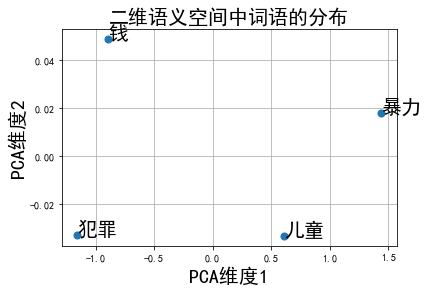

In [14]:
# 可视化

words = ['犯罪', '儿童', '钱', '暴力']
vectors = [model.wv[word] for word in words]

from sklearn.decomposition import PCA     # 语义空间降维，用于展示词语在二维空间的相对位置

# 使用PCA进行降维
pca = PCA(n_components = 2)
pca_result = pca.fit_transform(vectors)

import matplotlib.pyplot as plt     # 画图

# 绘制四个词语在二维空间的相对位置
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.figure()

# 取PCA降维结果中所有行的第一列和第二列数据绘制散点图，设置点的大小为50
plt.scatter(pca_result[:, 0], pca_result[:, 1], s = 50)

for i, word in enumerate(words):
    plt.annotate(word, (pca_result[i, 0], pca_result[i, 1]), fontsize = 20)

plt.xlabel('PCA维度1', fontsize = 20)
plt.ylabel('PCA维度2', fontsize = 20)
plt.title('二维语义空间中词语的分布', fontsize = 20)
plt.grid(True)
plt.show()

In [15]:
from gensim.models.callbacks import CallbackAny2Vec

class callback(CallbackAny2Vec):
    '''Callback to print loss after each epoch.'''

    def __init__(self):
        self.epoch = 0
        self.loss_to_be_subed = 0

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        loss_now = loss - self.loss_to_be_subed
        self.loss_to_be_subed = loss
        print('Loss after epoch {}: {}'.format(self.epoch, loss_now))
        self.epoch += 1
        
# 自己训练词嵌入模型
from gensim.models import Word2Vec

# 训练词嵌入模型
model = Word2Vec(
    corpus,     # 训练预料
    window = 5,     # 训练算法考虑的当前词语与预测词语在一个句子中的最大距离（窗口大小）
    vector_size = 100,     # 自定义训练向量维度
    min_count = 1,     # 忽略所有总频数低于这个值的词语
    compute_loss=True, callbacks=[callback()],
    epochs = 50
)

# 保存训练好的模型
model.save('word2vec_news.model')

Loss after epoch 0: 63785.6640625
Loss after epoch 1: 59826.7578125
Loss after epoch 2: 55237.90625
Loss after epoch 3: 49993.703125
Loss after epoch 4: 46589.78125
Loss after epoch 5: 44683.78125
Loss after epoch 6: 43634.5625
Loss after epoch 7: 41076.125
Loss after epoch 8: 42224.28125
Loss after epoch 9: 41855.65625
Loss after epoch 10: 41330.21875
Loss after epoch 11: 41082.6875
Loss after epoch 12: 40879.5
Loss after epoch 13: 40310.875
Loss after epoch 14: 39802.0
Loss after epoch 15: 39498.25
Loss after epoch 16: 39090.75
Loss after epoch 17: 38589.5
Loss after epoch 18: 38191.75
Loss after epoch 19: 36056.0
Loss after epoch 20: 37182.125
Loss after epoch 21: 36867.5
Loss after epoch 22: 36409.625
Loss after epoch 23: 35988.9375
Loss after epoch 24: 35571.4375
Loss after epoch 25: 35110.125
Loss after epoch 26: 34848.25
Loss after epoch 27: 34353.875
Loss after epoch 28: 34195.375
Loss after epoch 29: 33286.25
Loss after epoch 30: 33205.25
Loss after epoch 31: 32714.25
Loss aft